In [1]:
from sympy import *
init_printing()

In [2]:
# Define the variables
a, b, c, n = symbols("a, b, c, n")
X, Y, Z = symbols("X, Y, Z")
k, l = symbols("k, l")
lamda = symbols('lamda')

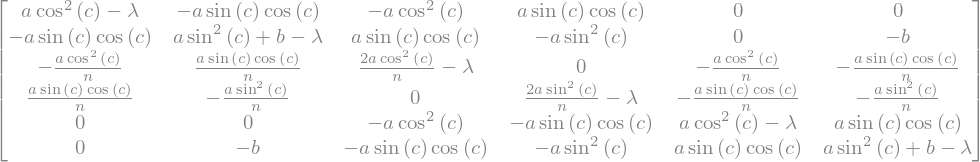

In [3]:
# A = W - lamda * I
A = Matrix([[a*(cos(c)**2)-lamda, -a*sin(c)*cos(c), -a*(cos(c)**2), a*sin(c)*cos(c), 0,0],
[-a*sin(c)*cos(c), a*(sin(c)**2)+b-lamda, a*sin(c)*cos(c), -a*(sin(c)**2), 0, -b],
[-a*(cos(c)**2)/n, a*sin(c)*cos(c)/n, a*2*(cos(c)**2)/n-lamda, 0, -a*(cos(c)**2)/n, -a*sin(c)*cos(c)/n],
[a*sin(c)*cos(c)/n, -a*(sin(c)**2)/n, 0, a*2*(sin(c)**2)/n-lamda, -a*sin(c)*cos(c)/n, -a*(sin(c)**2)/n],
[0, 0, -a*(cos(c)**2), -a*sin(c)*cos(c), a*(cos(c)**2)-lamda, a*sin(c)*cos(c)],
 [0, -b, -a*sin(c)*cos(c), -a*(sin(c)**2), a*sin(c)*cos(c), a*(sin(c)**2)+b-lamda]])
    
A

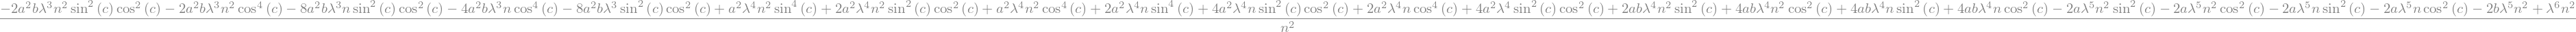

In [4]:
# Take the deteriminant
B = det(A)

B

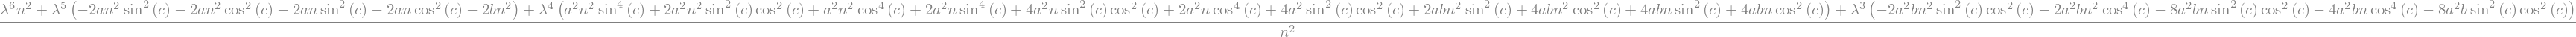

In [5]:
# Simplify as the power of lamda
C = collect(B, lamda)

C

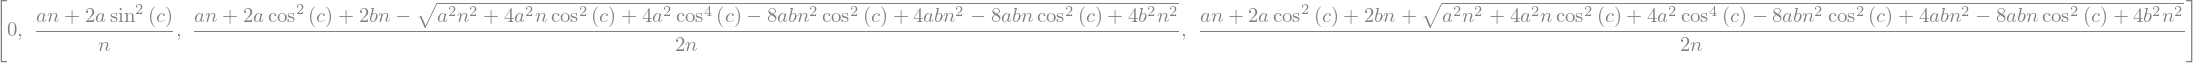

In [6]:
# Now solve eigen equation det(A) = 0, the roots are the eigenvalues : multiplicity

#D = roots(C, lamda)

D = solve(C, lamda)

D

In [7]:
number = ((a*n+2*a*(sin(c)**2))/n).subs({a:1, b:1/2, c:pi/4, n:8})
number.n()

In [8]:
# Substitute for symplified Hydrogen

E = C.subs({a:1, b:1/2, c:pi/4, n:8})

F = roots(E, lamda)

F

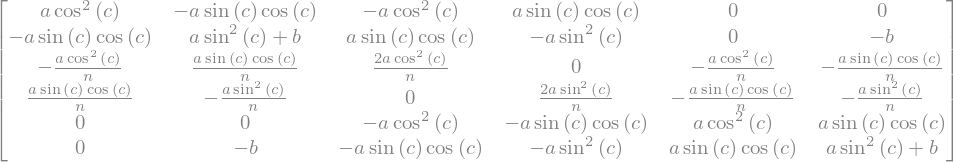

In [9]:
# The Matrix
W = Matrix([[a*(cos(c)**2), -a*sin(c)*cos(c), -a*(cos(c)**2), a*sin(c)*cos(c), 0,0],
[-a*sin(c)*cos(c), a*(sin(c)**2)+b, a*sin(c)*cos(c), -a*(sin(c)**2), 0, -b],
[-a*(cos(c)**2)/n, a*sin(c)*cos(c)/n, a*2*(cos(c)**2)/n, 0, -a*(cos(c)**2)/n, -a*sin(c)*cos(c)/n],
[a*sin(c)*cos(c)/n, -a*(sin(c)**2)/n, 0, a*2*(sin(c)**2)/n, -a*sin(c)*cos(c)/n, -a*(sin(c)**2)/n],
[0, 0, -a*(cos(c)**2), -a*sin(c)*cos(c), a*(cos(c)**2), a*sin(c)*cos(c)],
 [0, -b, -a*sin(c)*cos(c), -a*(sin(c)**2), a*sin(c)*cos(c), a*(sin(c)**2)+b]])

W

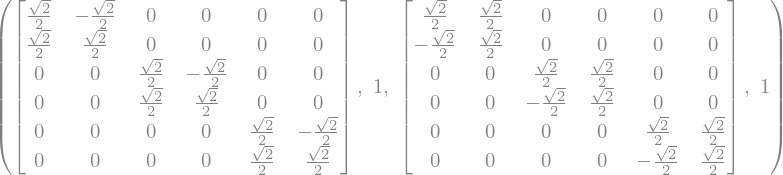

In [10]:
# I wanna rotate the coordinate by angle of pi/4, 
# that would make the system look same as the one I used for simplified Hydrogen.
s = 1/sqrt(2)
R = s*Matrix([[1,-1,0,0,0,0],
           [1,1,0,0,0,0],
           [0,0,1,-1,0,0],
           [0,0,1,1,0,0],
           [0,0,0,0,1,-1],
           [0,0,0,0,1,1]])
Ri = s*Matrix([[1,1,0,0,0,0],
           [-1,1,0,0,0,0],
           [0,0,1,1,0,0],
           [0,0,-1,1,0,0],
           [0,0,0,0,1,1],
           [0,0,0,0,-1,1]])


R, det(R), Ri, det(Ri)

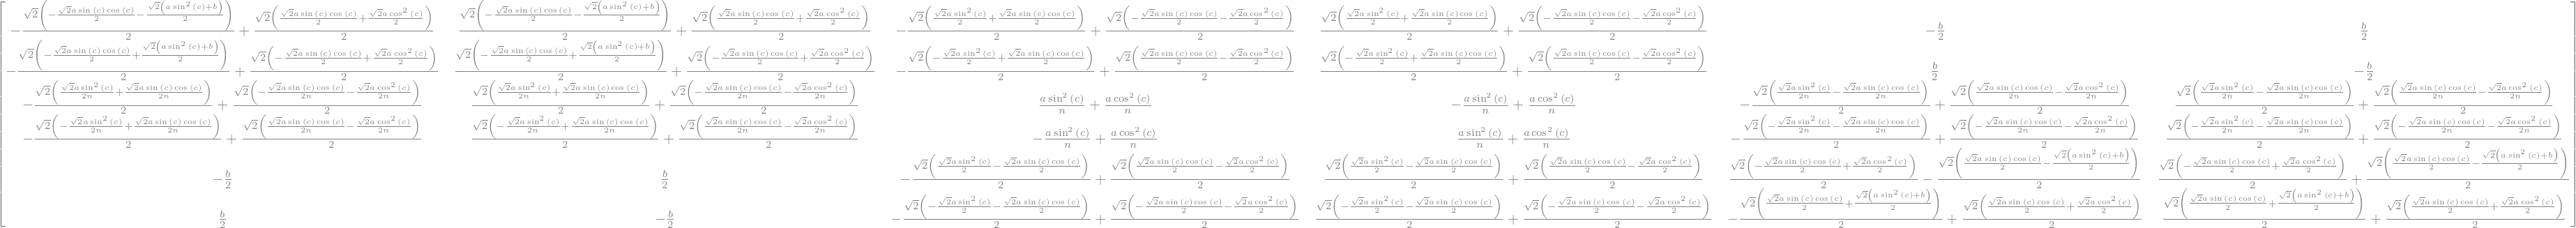

In [11]:
# Now Rotate

HM = R*W*Ri

HM

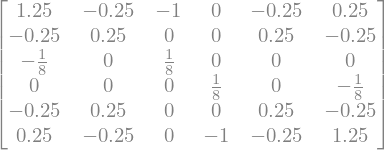

In [12]:
# Substitute the parameters for symplified Hydrogen

E = HM.subs({a:1, b:1/2, c:pi/4, n:8})

E # They match!!

In [13]:
eigen = E.eigenvals()

eigen # Them too

In [14]:
Modes = [sqrt(0.352636456774966),sqrt(1.125),sqrt(1.77236354322503)]

Modes

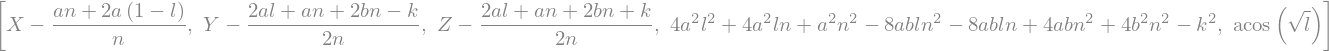

In [15]:
# Solve inversely for a,b,l (n has to be known)
# l = cos^2(c)
p1 = X - 1/n*(a*n+2*a*(1-l))
p2 = Y - 1/(2*n)*(a*n+2*a*l+2*b*n - k)
p3 = Z - 1/(2*n)*(a*n+2*a*l+2*b*n + k)
p4 = ((a*n)**2+4*(a**2)*n*l+4*(a**2)*(l**2)-8*a*b*(n**2)*l+4*a*b*(n**2)-8*a*b*n*l+4*(b*n)**2) - k**2
p5 = acos(sqrt(l))
[p1,p2,p3,p4,p5]

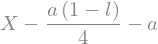

In [16]:
eq1 = p1.subs(n,8)

eq1

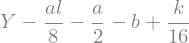

In [17]:
eq2 = p2.subs(n,8)

eq2

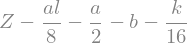

In [18]:
eq3 = p3.subs(n,8)

eq3

In [19]:
eq4 = p4.subs(n,8)

eq4

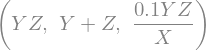

In [20]:
# Define parameters(X,Y,Z)
P = Y*Z
S = Y + Z
Q = 2/5*P/(4*X)

P, S, Q

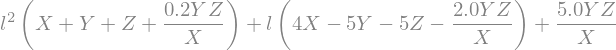

In [21]:
# Equation for l
Eql = (2*Q+X+S)*(l**2)+(-20*Q+4*X-5*S)*l+50*Q

Eql

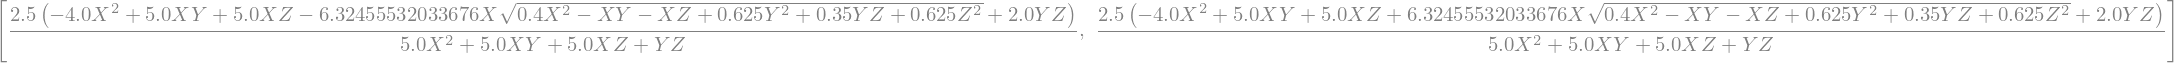

In [22]:
Rootl = solve(Eql, l)

Rootl

In [23]:
# Check for Hydrogen

In [24]:
l1 = Rootl[0].subs({X:1.125, Y:0.352636456774966, Z:1.77236354322503})
l2 = Rootl[1].subs({X:1.125, Y:0.352636456774966, Z:1.77236354322503})
l1,l2

In [25]:
C81 = 4*X/(5-l)
C81.subs({X:1.125, l:l1})

In [26]:
C82 = 2/5*Y*Z/(C81*l)
C82.subs({X:1.125, l:l1, Y:0.352636456774966, Z:1.77236354322503})

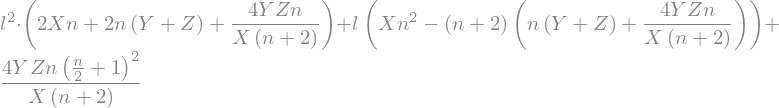

In [27]:
# Equation for l, generalized n

# Define parameters(X,Y,Z,n)
p = 4*(n**2)*Y*Z
s = 2*n*(Y+Z)
q = p/(4*(n**2)*(n+2)*X)

Eqln = (s + 4*n*q + 2*n*X)*(l**2) + ((n**2)*X - (n+2)*(s/2 + 4*n*q))*l + 4*n*q*((n/2+1)**2)

Eqln

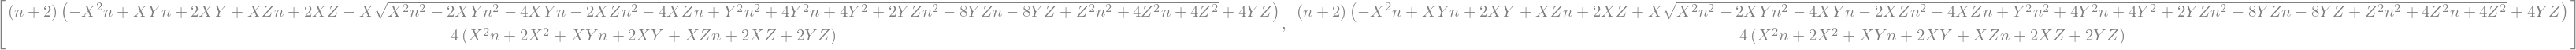

In [28]:
Rootln = solve(Eqln, l)

Rootln

In [29]:
collect(((X**2)*(n+2)+n*X*Y+2*X*Y+X*Z*n+2*X*Z+2*Y*Z), n)

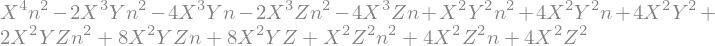

In [30]:
expand((-(X**2)*n+X*Y*n+2*X*Y+X*Z*n+2*X*Z)**2)

In [31]:
# Check for hydrogen

In [32]:
l81 = Rootln[0].subs({X:1.125, Y:0.352636456774966, Z:1.77236354322503, n:8}).n()
l82 = Rootln[1].subs({X:1.125, Y:0.352636456774966, Z:1.77236354322503, n:8}).n()
l81,l82

In [33]:
c81 = acos(sqrt(l81))

c81, (pi/4).n() # So C81 is equal to pi/4

In [34]:
C1 = n*X/(2*(n/2+1-l))

C1.subs({X:1.125, l:l81, n:8})

In [35]:
C2 = q*(n/2+1-l)/l

C2.subs({X:1.125, l:l81, Y:0.352636456774966, Z:1.77236354322503, n:8})

In [36]:
# lambda = m * omega**2

# angle is independent of unit mass of the molecule
# Here angle is degree

#H2O

ratio = 16

wavenumber1 = 3506
wavenumber2 = 1885
wavenumber3 = 3585

# In spectroscopy, wavenumber = 2 * pi * speed of light in vacuume
omega1 = wavenumber1*2*pi*299792458*(10**2)
omega2 = wavenumber2*2*pi*299792458*(10**2)
omega3 = wavenumber3*2*pi*299792458*(10**2)

m = 100000

eig1 = m*(omega1**2)
eig2 = m*(omega2**2)
eig3 = m*(omega3**2)

lhydrogen = Rootln[0].subs({X:eig1, Y:eig2, Z:eig3, n:ratio})
anglehydrogen = acos(sqrt(lhydrogen))*180/pi
exactangle = 104.45/2
lhydrogen.n(),anglehydrogen.n(), exactangle

In [37]:
#H2O

ratio = 16

wavenumber1 = 3280
wavenumber2 = 1648
wavenumber3 = 3410

# In spectroscopy, wavenumber = 2 * pi * speed of light in vacuume
omega1 = wavenumber1*2*pi*299792458*(10**2)
omega2 = wavenumber2*2*pi*299792458*(10**2)
omega3 = wavenumber3*2*pi*299792458*(10**2)

m = 10

eig1 = m*(omega1**2)
eig2 = m*(omega2**2)
eig3 = m*(omega3**2)

lhydrogen = Rootln[0].subs({X:eig1, Y:eig2, Z:eig3, n:ratio})
anglehydrogen = acos(sqrt(lhydrogen))*180/pi
exactangle = 104.45/2
lhydrogen.n(),anglehydrogen.n(), exactangle

In [38]:
#H2O

ratio = 16


wavenumber1 = 3657
wavenumber2 = 1595
wavenumber3 = 3756

# In spectroscopy, wavenumber = 2 * pi * speed of light in vacuume
omega1 = wavenumber1*2*pi*299792458*(10**2)
omega2 = wavenumber2*2*pi*299792458*(10**2)
omega3 = wavenumber3*2*pi*299792458*(10**2)

m = 100000

eig1 = m*(omega1**2)
eig2 = m*(omega2**2)
eig3 = m*(omega3**2)

lhydrogen = Rootln[0].subs({X:eig1, Y:eig2, Z:eig3, n:ratio})
anglehydrogen = acos(sqrt(lhydrogen))*180/pi
exactangle = 104.45/2
lhydrogen.n(),anglehydrogen.n(), exactangle

In [39]:
# Cl2O

ratio = 16/35.453

wavenumber1 = 869
wavenumber2 = 312
wavenumber3 = 991

# In spectroscopy, frequency = 2 * pi * speed of light in vacuume * wavenumber
omega1 = wavenumber1*2*pi*299792458*(10**2)
omega2 = wavenumber2*2*pi*299792458*(10**2)
omega3 = wavenumber3*2*pi*299792458*(10**2)

m = 1000

eig1 = m*(omega1**2)
eig2 = m*(omega2**2)
eig3 = m*(omega3**2)

lhydrogen = Rootln[0].subs({X:eig1, Y:eig2, Z:eig3, n:ratio})
anglehydrogen = acos(sqrt(lhydrogen))*180/pi
exactangle = 110/2
lhydrogen.n(),anglehydrogen.n(), exactangle

In [40]:
#X,Y,Zの順番の問題でもないきが